In [7]:
# ca_maze.py
import numpy as np
from scipy.signal import convolve2d
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import os


# Create a maze using the cellular automaton approach described at              
# https://scipython.com/blog/maze-generation-by-cellular-automaton/             
# The frames for animation of the growth of the maze are saved to               
# the subdirectory ca_frames/.                                                  
# Christian Hill, January 2018.

def ca_step(X):
    """Evolve the maze by a single CA step."""

    K = np.ones((3, 3))
    n = convolve2d(X, K, mode='same', boundary='wrap') - X
    return (n == 3) | (X & ((n > 0) & (n < 6)))

0/400
1/400
2/400
3/400
4/400
5/400
6/400
7/400
8/400
9/400
10/400
11/400
12/400
13/400
14/400
15/400
16/400
17/400
18/400
19/400
20/400
21/400
22/400
23/400
24/400
25/400
26/400
27/400
28/400
29/400
30/400
31/400
32/400
33/400
34/400
35/400
36/400
37/400
38/400
39/400
40/400
41/400
42/400
43/400
44/400
45/400
46/400
47/400
48/400
49/400
50/400
51/400
52/400
53/400
54/400
55/400
56/400
57/400
58/400
59/400
60/400
61/400
62/400
63/400
64/400
65/400
66/400
67/400
68/400
69/400
70/400
71/400
72/400
73/400
74/400
75/400
76/400
77/400
78/400
79/400
80/400
81/400
82/400
83/400
84/400
85/400
86/400
87/400
88/400
89/400
90/400
91/400
92/400
93/400
94/400
95/400
96/400
97/400
98/400
99/400
100/400
101/400
102/400
103/400
104/400
105/400
106/400
107/400
108/400
109/400
110/400
111/400
112/400
113/400
114/400
115/400
116/400
117/400
118/400
119/400
120/400
121/400
122/400
123/400
124/400
125/400
126/400
127/400
128/400
129/400
130/400
131/400
132/400
133/400
134/400
135/400
136/400
137/400
138/40

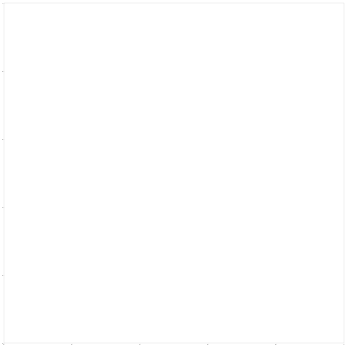

In [36]:
# Maze size
nx, ny = 200, 150
X = np.zeros((ny, nx), dtype=np.bool)
# Size of initial random area (must be even numbers)
mx, my = 20, 16

# Initialize a patch with a random mx x my region
r = np.random.random((my, mx)) > 0.75
X[ny//2-my//2:ny//2+my//2, nx//2-mx//2:nx//2+mx//2] = r

# Total number of iterations
nit = 400
# Make an image every ipf iterations
ipf = 1

# Figure dimensions (pixels) and resolution (dpi)
width, height, dpi = 600, 450, 5
fig = plt.figure(figsize=(width/dpi, height/dpi), dpi=dpi)
ax = fig.add_subplot(111)

dirName = "ca_frames/"
if not os.path.exists(dirName):
        os.mkdir(dirName)
dirName2 = "data/"
if not os.path.exists(dirName2):
        os.mkdir(dirName2)
for i in range(nit):
    X = ca_step(X)
    np.savetxt(dirName2+"step_"+str(i)+".csv", X,fmt='%d', delimiter=",")
    if not i % ipf:
        print('{}/{}'.format(i,nit))
        im = ax.imshow(X, cmap=plt.cm.binary, interpolation='nearest')
        plt.axis('off')
        plt.savefig('ca_frames/_img{:04d}.png'.format(i), dpi=dpi)
        plt.cla()

In [24]:
from PIL import Image
import imageio
import glob
image_list = []
for filename in glob.glob('ca_frames/*.png'): #assuming gif
    im=np.array(Image.open(filename))
    image_list.append(im)
imageio.mimsave('movie.gif', image_list)

![SegmentLocal](movie.gif "segment")